<a href="https://colab.research.google.com/github/Debo12/datascience.guvi-final-project/blob/master/Classification_Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary libraries and Load Data

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
df = pd.read_csv("/content/drive/MyDrive/Guvi/Final Project/Datasets/Loan Status Prediction/Loan_Status_train.csv")

# Exploratory Data Analysis (EDA)

### Print the first few rows of the data

In [169]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Check for missing values

In [170]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [171]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)
df["Married"] = df["Married"].apply(lambda x: 1 if x == "Yes" else 0)
df["Dependents"] = df["Dependents"].map({"0": 0, "1": 1, "2": 2, "3+": 3})

In [172]:
df.fillna(df.mode())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [173]:
df.fillna(df.mean())

<ipython-input-173-a2478f315f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,1,1,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,1,1,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,1,1,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [174]:
df['Dependents'] = df['Dependents'].fillna(0)
df['Self_Employed'] = df['Self_Employed'].fillna('Unknown')
df['LoanAmount'] = df['LoanAmount'].fillna(0)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(0)
df['Credit_History'] = df['Credit_History'].fillna(0)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(3), object(5)
memory usage: 62.5+ KB


### Visualize the distribution of Loan Status

<Axes: xlabel='Loan_Status', ylabel='count'>

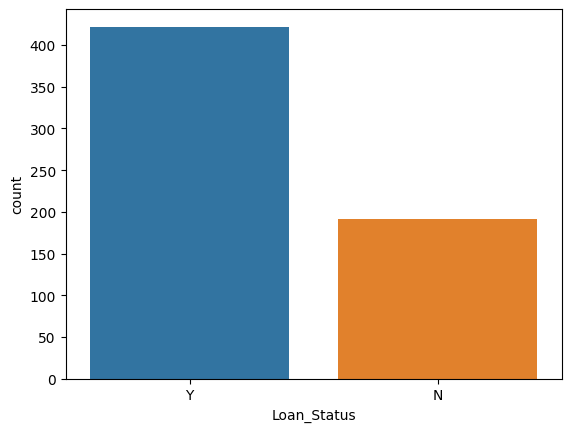

In [176]:
sns.countplot(x='Loan_Status', data=df)

### Visualize the relationship between Loan Amount and Loan Status

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

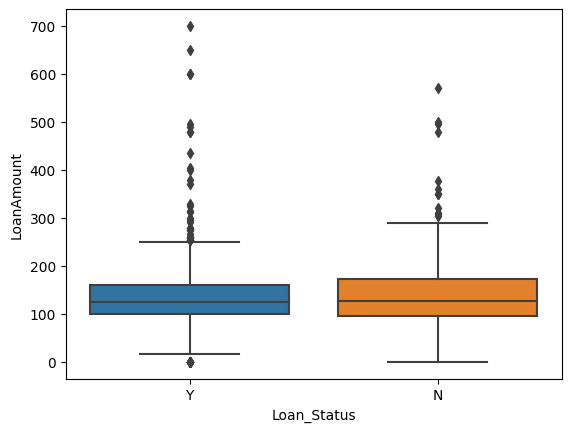

In [177]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)

### Visualize the relationship between Credit History and Loan Status

<Axes: xlabel='Credit_History', ylabel='count'>

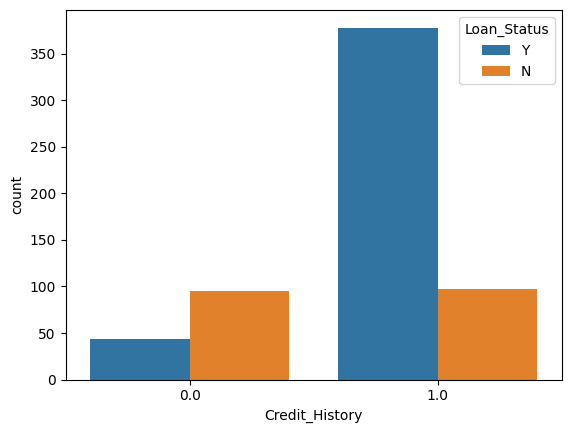

In [178]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

# Feature Preprocessing

### Drop unnecessary columns

In [179]:
df = df.drop(['Loan_ID'], axis=1)

### Convert categorical variables to numerical using one-hot encoding

In [180]:
df = pd.get_dummies(df, drop_first=True)

In [181]:
df.head()

,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Not Graduate,Self_Employed_Unknown,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0.0,5849,0.0,0.0,360.0,1.0,0,0,0,0,1,1
1,1,1,1.0,4583,1508.0,128.0,360.0,1.0,0,0,0,0,0,0
2,1,1,0.0,3000,0.0,66.0,360.0,1.0,0,0,1,0,1,1
3,1,1,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,1,1
4,1,0,0.0,6000,0.0,141.0,360.0,1.0,0,0,0,0,1,1


### Split the data into training and testing sets

In [182]:
X = df.drop(['Loan_Status_Y'], axis=1)
y = df['Loan_Status_Y']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
X_train.shape

(491, 13)

### Scale the data using StandardScaler

In [185]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation

### Logistic Regression

In [186]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [188]:
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print('Logistic Regression Accuracy:', lr_acc)

Logistic Regression Accuracy: 0.7398373983739838


### Decision Tree

In [189]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [190]:
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print('Decision Tree Accuracy:', dt_acc)

Decision Tree Accuracy: 0.6585365853658537


### Random Forest

In [191]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [192]:
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy:', rf_acc)

Random Forest Accuracy: 0.7398373983739838


### XGBoost

In [193]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [194]:
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print('XGBoost Accuracy:', xgb_acc)

XGBoost Accuracy: 0.7073170731707317


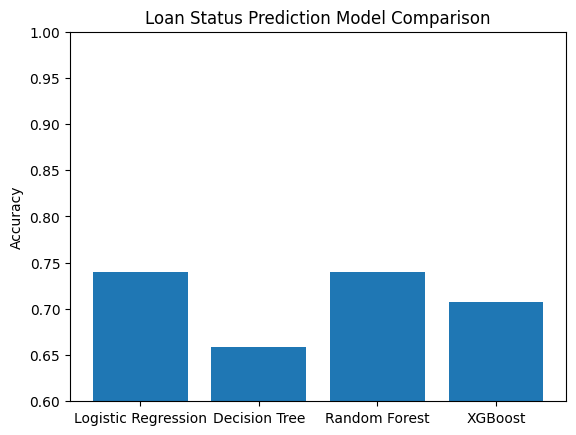

In [195]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [lr_acc, dt_acc, rf_acc, xgb_acc]
plt.bar(models, accuracies)
plt.title('Loan Status Prediction Model Comparison')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.show()